<a href="https://colab.research.google.com/github/mahshidyaghoobzadeh/Recommendation_p/blob/main/mask_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from nltk import tokenize
from operator import itemgetter
import math
import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

In [ ]:
import numpy as np
import pandas as pd
import torch
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_csv('/content/dataset_facemask_with_target1.csv')
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()
print(df.shape)

(536, 17)


In [ ]:
text = []
for i in range(df['How to make or use'].shape[0]):
  text.append(df['How to make or use'][i])


In [ ]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
for i in symbols:
    data = np.char.replace(text, i, ' ')


In [ ]:
def check_sent(word, sentences):
    final = [all([w in x for w in word]) for x in sentences]
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))

In [ ]:
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n])
    return result

In [ ]:
for i in range(df.shape[0]):
  doc = df['How to make or use'][i]
  total_words = doc.split()
  total_word_length = len(total_words)
  print("total number of word is :",total_word_length)
  total_sentences = tokenize.sent_tokenize(doc)
  total_sent_len = len(total_sentences)
  print("Total number of sentences is :", total_sent_len)


total number of word is : 192
Total number of sentences is : 13
total number of word is : 100
Total number of sentences is : 7
total number of word is : 38
Total number of sentences is : 4
total number of word is : 38
Total number of sentences is : 3
total number of word is : 31
Total number of sentences is : 2
total number of word is : 39
Total number of sentences is : 2
total number of word is : 36
Total number of sentences is : 2
total number of word is : 31
Total number of sentences is : 3
total number of word is : 47
Total number of sentences is : 2
total number of word is : 34
Total number of sentences is : 1
total number of word is : 41
Total number of sentences is : 3
total number of word is : 42
Total number of sentences is : 3
total number of word is : 49
Total number of sentences is : 5
total number of word is : 24
Total number of sentences is : 3
total number of word is : 28
Total number of sentences is : 4
total number of word is : 53
Total number of sentences is : 5
total

In [ ]:
tf_score = {}
key_word =[]
for i in range(df.shape[0]):
  doc = df['How to make or use'][i]
  total_words = doc.split()
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
      if each_word in tf_score:
        tf_score[each_word] += 1
      else:
        tf_score[each_word] = 1

  # Dividing by total_word_length for each dictionary element
  tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
  idf_score = {}
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] += check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

  # Performing a log and divide
  idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())
  tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
  key_word.append(get_top_n(tf_idf_score, 1))


In [ ]:
tf_score = {}
key_word_description =[]
for i in range(df.shape[0]):
  doc = df['description'][i]
  total_words = doc.split()
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
      if each_word in tf_score:
        tf_score[each_word] += 1
      else:
        tf_score[each_word] = 1

  # Dividing by total_word_length for each dictionary element
  tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())
  idf_score = {}
  for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] += check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

  # Performing a log and divide
  idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())
  tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}
  key_word_description.append(get_top_n(tf_idf_score, 1))


In [ ]:
kw_decription = []
for i in range(df.shape[0]):
  for x in key_word_description[i].keys():
    kw_decription.append(x)

In [ ]:
kw = []
for i in range(df.shape[0]):
  for x in key_word[i].keys():
    kw.append(x)

In [ ]:
kw = np.array(kw)
kw.shape

(536,)

In [ ]:
kw_decription = np.array(kw_decription)
kw_decription.shape

(536,)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ordinal_encoder = OrdinalEncoder()
kw = kw.reshape(-1,1)
kw = ordinal_encoder.fit_transform(kw)
kw_decription = kw_decription.reshape(-1,1)
kw_decription = ordinal_encoder.fit_transform(kw_decription)


In [ ]:
age =[]
a = df['age'].value_counts()
for x in  a.index:
  age.append(x)

In [ ]:
for x in age:
  if (x=='> 15') or (x=='>15') :
    i=np.where(df['age']== '> 15')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([17.5])
  if x=='> 15' :
    i=np.where(df['age']== '>15')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([17.5])
  if (x=='> 20') or (x=='>20') :
    i=np.where(df['age']== '> 20')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 20') or (x=='>20') or (x=='> 20`') :
    i=np.where(df['age']== '>20')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 20') or (x=='>20') or (x=='> 20`') :
    i=np.where(df['age']== '> 20`')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 20 ') :
    i=np.where(df['age']== '> 20 ')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([25])
  if (x=='> 25') or (x=='>25') :
    i=np.where(df['age']== '>25')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([27.5])
  if (x=='> 25') or (x=='>25') :
    i=np.where(df['age']== '> 25')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([27.5])
  if (x=='> 30') or (x=='>30') :
    i=np.where(df['age']== '>30')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([32.5])
  if (x=='> 30') or (x=='>30') :
    i=np.where(df['age']== '> 30')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([32.5])
  if (x=='> 12') or (x=='>12') :
    i=np.where(df['age']== '>12')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([13.5])
  if (x=='> 12') or (x=='>12') :
    i=np.where(df['age']== '> 12')
    i1=[[x for x in j]for j in i ]
    df.iloc[i1,3]=np.array([13.5])



In [ ]:
df['age'].value_counts()

17.5    223
25.0    207
27.5     60
32.5     29
13.5     17
Name: age, dtype: int64

In [ ]:
df['label'].value_counts()

face mask       336
treatment        38
cleanser         31
oil              31
rejuvenation     30
scrub            24
exfoliator       24
toner            17
peel mask         2
night cream       1
serum             1
cream             1
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ordinal_encoder = OrdinalEncoder()
target1=np.array(df['label'])
target1=target1.reshape(-1,1)
target_ordinal= ordinal_encoder.fit_transform(target1)
target_ordinal = target_ordinal.ravel()


In [ ]:

target=pd.get_dummies(df['label'], prefix_sep='_', drop_first=False)
target=np.array(target)
print(target.shape)


(536, 12)


In [ ]:
target_frame = pd.DataFrame(target)

In [ ]:
target_frame.value_counts()

0  1  2  3  4  5  6  7  8  9  10  11
0  0  0  1  0  0  0  0  0  0  0   0     336
         0  0  0  0  0  0  0  0   1      38
1  0  0  0  0  0  0  0  0  0  0   0      31
0  0  0  0  0  1  0  0  0  0  0   0      31
               0  0  1  0  0  0   0      30
      1  0  0  0  0  0  0  0  0   0      24
      0  0  0  0  0  0  1  0  0   0      24
                        0  0  1   0      17
                  1  0  0  0  0   0       2
   1  0  0  0  0  0  0  0  0  0   0       1
   0  0  0  1  0  0  0  0  0  0   0       1
            0  0  0  0  0  1  0   0       1
dtype: int64

In [ ]:
df['How to make or use'] =kw
df['description']=kw_decription

In [ ]:
df['age'] = df['age'].astype('float32')

In [ ]:
df1 = df.drop('label',axis=1)

In [ ]:
!pip install category_encoders


     |████████████████████████████████| 81kB 2.6MB/s 


In [ ]:

import category_encoders as ce
c5=df1.columns
encoder5 = ce.TargetEncoder(cols=[x for x in c5])

target_encoder_all= encoder5.fit_transform(df1,target_ordinal)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[Text(0.5, 0, 'name'),
 Text(1.5, 0, 'description'),
 Text(2.5, 0, 'age'),
 Text(3.5, 0, 'Target1'),
 Text(4.5, 0, 'Target2'),
 Text(5.5, 0, 'Target3'),
 Text(6.5, 0, 'dry'),
 Text(7.5, 0, 'oily '),
 Text(8.5, 0, 'normal'),
 Text(9.5, 0, 'sensitive'),
 Text(10.5, 0, 'clear'),
 Text(11.5, 0, 'almost clear'),
 Text(12.5, 0, 'mild'),
 Text(13.5, 0, 'moderate'),
 Text(14.5, 0, 'severe'),
 Text(15.5, 0, 'How to make or use')]

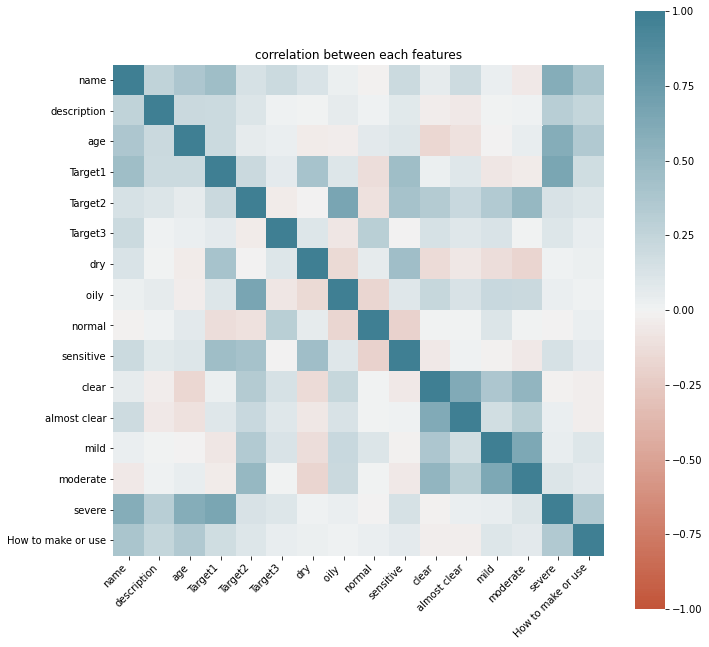

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 11))
plt.title('correlation between each features')
corr =target_encoder_all.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X=target_encoder_all
y=target_ordinal
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)


(536, 16) (536,)


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))


Accuracy: 68.52%
Accuracy train: 88.79%


In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer


In [ ]:
def class_report(y_true, y_pred, y_score=None, average='micro'):
  if y_true.shape != y_pred.shape:
    print("Error! y_true %s is not the same shape as y_pred %s" % (
          y_true.shape,
          y_pred.shape)
        )
    return

  lb = LabelBinarizer()

  if len(y_true.shape) == 1:
        lb.fit(y_true)

  #Value counts of predictions
  labels, cnt = np.unique(y_pred,return_counts=True)
  n_classes = len(labels)
  pred_cnt = pd.Series(cnt, index=labels)

  metrics_summary = precision_recall_fscore_support(y_true=y_true,y_pred=y_pred,labels=labels)

  avg = list(precision_recall_fscore_support(y_true=y_true, y_pred=y_pred,average='weighted'))

  metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
  class_report_df = pd.DataFrame(list(metrics_summary),index=metrics_sum_index,columns=labels)

  support = class_report_df.loc['support']
  total = support.sum()
  class_report_df['avg / total'] = avg[:-1] + [total]

  class_report_df = class_report_df.T
  class_report_df['pred'] = pred_cnt
  class_report_df['pred'].iloc[-1] = total

  if not (y_score is None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for label_it, label in enumerate(labels):
      fpr[label], tpr[label], _ = roc_curve((y_true == label).astype(int), y_score[:, label_it])
      roc_auc[label] = auc(fpr[label], tpr[label])

    if average == 'micro':
      if n_classes <= 2:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score[:, 1].ravel())
      else:
        fpr["avg / total"], tpr["avg / total"], _ = roc_curve(lb.transform(y_true).ravel(), y_score.ravel())

      roc_auc["avg / total"] = auc(fpr["avg / total"],tpr["avg / total"])

    elif average == 'macro':
      # First aggregate all false positive rates
      all_fpr = np.unique(np.concatenate([fpr[i] for i in labels]))
      # Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in labels:
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
      mean_tpr /= n_classes
      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

    class_report_df['AUC'] = pd.Series(roc_auc)

  return class_report_df


In [ ]:
X_trainsm, X_testsm, y_trainsm, y_testsm = train_test_split(X_ros, y_ros, test_size=0.5, random_state=5)
print(X_trainsm.shape, X_testsm.shape, y_trainsm.shape, y_testsm.shape)

model=XGBClassifier(n_estimators=41,max_depth=90,learning_rate=0.7)

model.fit(X_trainsm, y_trainsm)
y_pred_trainsm = model.predict(X_trainsm)
y_predsm = model.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm)
accuracysm = accuracy_score(y_testsm, y_predsm)
print("Accuracysm: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm: %.2f%%" % (accuracy_trainsm * 100.0))



(2016, 16) (2016, 16) (2016,) (2016,)
Accuracysm: 96.88%
Accuracy trainsm: 99.55%


In [ ]:
!pip install scikit-plot

import scikitplot as skplt
import matplotlib.pyplot as plt

(2016,) (2016,)


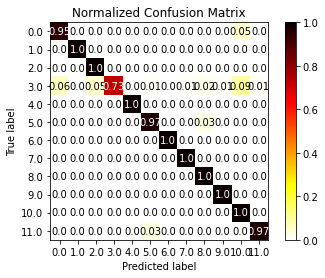

In [ ]:
probas = model.predict(X_testsm)

y_testsm = y_testsm.reshape(y_testsm.shape[0])
y_predsm = probas.reshape(probas.shape[0])
print(y_testsm.shape,y_predsm.shape)


skplt.metrics.plot_confusion_matrix(y_testsm,y_predsm, normalize=True, cmap='hot_r')
plt.show()


In [ ]:
report_with_auc = class_report(
    y_true=y_testsm,
    y_pred=model.predict(X_testsm),
    y_score=model.predict_proba(X_testsm))
print("XGBClassifier\n",report_with_auc)

XGBClassifier
              precision    recall  f1-score  support    pred       AUC
0.0           0.940476  0.946108  0.943284    167.0   168.0  0.997043
1.0           1.000000  1.000000  1.000000    162.0   162.0  1.000000
2.0           0.955056  1.000000  0.977011    170.0   178.0  0.999831
3.0           1.000000  0.732919  0.845878    161.0   118.0  0.979769
4.0           1.000000  1.000000  1.000000    172.0   172.0  1.000000
5.0           0.951515  0.969136  0.960245    162.0   165.0  0.999735
6.0           1.000000  1.000000  1.000000    167.0   167.0  1.000000
7.0           0.994083  1.000000  0.997033    168.0   169.0  1.000000
8.0           0.948571  1.000000  0.973607    166.0   175.0  0.999943
9.0           0.994152  1.000000  0.997067    170.0   171.0  1.000000
10.0          0.880597  1.000000  0.936508    177.0   201.0  0.999622
11.0          0.988235  0.965517  0.976744    174.0   170.0  0.999925
avg / total   0.970664  0.968750  0.967611   2016.0  2016.0  0.999195


Accuracysm of log_clf: 65.18%
Accuracy trainsm of log_clf: 68.15%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


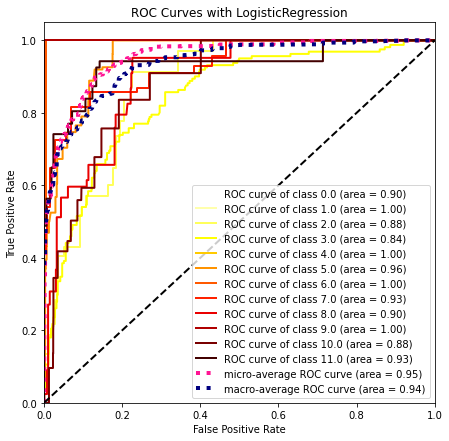

In [ ]:
log_clf = LogisticRegression(penalty='l2',max_iter=10000,C=1,solver='lbfgs',l1_ratio=None)
log_clf.fit(X_trainsm, y_trainsm)
y_pred_trainsmlog_clf = log_clf.predict(X_trainsm)
y_predsmlog_clf = log_clf.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsmlog_clf)
accuracysm = accuracy_score(y_testsm, y_predsmlog_clf)
print("Accuracysm of log_clf: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of log_clf: %.2f%%" % (accuracy_trainsm * 100.0))

probas1 = log_clf.predict_proba(X_testsm)

skplt.metrics.plot_roc_curve(y_testsm,probas1,title="ROC Curves with LogisticRegression", cmap='hot_r', figsize=[7,7])
plt.show()

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

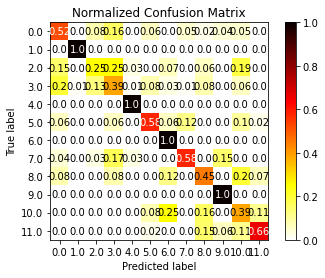

In [ ]:
skplt.metrics.plot_confusion_matrix(y_testsm,y_predsmlog_clf, normalize=True, cmap='hot_r')
plt.show()


In [ ]:
report_with_auc = class_report(
    y_true=y_testsm,
    y_pred=log_clf.predict(X_testsm),
    y_score=log_clf.predict_proba(X_testsm))
print("LogisticRegression\n",report_with_auc)

LogisticRegression
              precision    recall  f1-score  support    pred       AUC
0.0           0.500000  0.520958  0.510264    167.0   174.0  0.904677
1.0           0.993865  1.000000  0.996923    162.0   163.0  1.000000
2.0           0.518072  0.252941  0.339921    170.0    83.0  0.878296
3.0           0.346154  0.391304  0.367347    161.0   182.0  0.843904
4.0           0.934783  1.000000  0.966292    172.0   184.0  1.000000
5.0           0.701493  0.580247  0.635135    162.0   134.0  0.956056
6.0           0.644788  1.000000  0.784038    167.0   259.0  0.998096
7.0           0.763780  0.577381  0.657627    168.0   127.0  0.931445
8.0           0.477707  0.451807  0.464396    166.0   157.0  0.896853
9.0           0.798122  1.000000  0.887728    170.0   213.0  1.000000
10.0          0.363158  0.389831  0.376022    177.0   190.0  0.882923
11.0          0.766667  0.660920  0.709877    174.0   150.0  0.933253
avg / total   0.650490  0.651786  0.640988   2016.0  2016.0  0.952414


In [ ]:
RandomForest=RandomForestClassifier(bootstrap= False,max_depth= 70,max_features= 1,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100)

RandomForest.fit(X_trainsm, y_trainsm)
y_pred_trainsm_rnd = RandomForest.predict(X_trainsm)
y_predsm_rnd = RandomForest.predict(X_testsm)
accuracy_trainsm = accuracy_score(y_trainsm, y_pred_trainsm_rnd)
accuracysm = accuracy_score(y_testsm, y_predsm_rnd)
print("Accuracysm of random_forest: %.2f%%" % (accuracysm * 100.0))
print("Accuracy trainsm of random_forest: %.2f%%" % (accuracy_trainsm * 100.0))



Accuracysm of random_forest: 97.37%
Accuracy trainsm of random_forest: 99.55%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


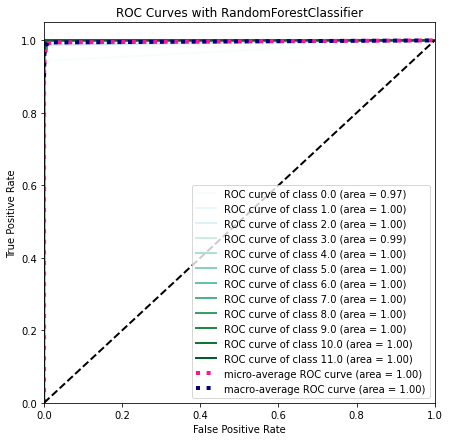

In [ ]:
probas2 = RandomForest.predict_proba(X_testsm)

skplt.metrics.plot_roc_curve(y_testsm,probas2,title="ROC Curves with RandomForestClassifier", cmap='BuGn', figsize=[7,7])
plt.show()




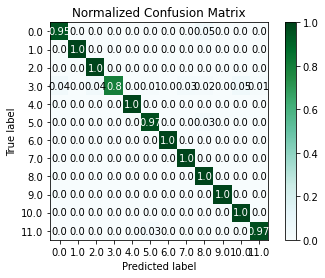

In [ ]:

skplt.metrics.plot_confusion_matrix(y_testsm,y_predsm_rnd, normalize=True,cmap='BuGn')
plt.show()


In [ ]:
report_with_auc = class_report(
    y_true=y_testsm,
    y_pred=RandomForest.predict(X_testsm),
    y_score=RandomForest.predict_proba(X_testsm))
print("RandomForest\n",report_with_auc)

RandomForest
              precision    recall  f1-score  support    pred       AUC
0.0           0.957576  0.946108  0.951807    167.0   165.0  0.971713
1.0           1.000000  1.000000  1.000000    162.0   162.0  1.000000
2.0           0.965909  1.000000  0.982659    170.0   176.0  1.000000
3.0           1.000000  0.795031  0.885813    161.0   128.0  0.993638
4.0           1.000000  1.000000  1.000000    172.0   172.0  1.000000
5.0           0.957317  0.969136  0.963190    162.0   164.0  0.999719
6.0           1.000000  1.000000  1.000000    167.0   167.0  1.000000
7.0           0.971098  1.000000  0.985337    168.0   173.0  1.000000
8.0           0.902174  1.000000  0.948571    166.0   184.0  0.999764
9.0           1.000000  1.000000  1.000000    170.0   170.0  1.000000
10.0          0.956757  1.000000  0.977901    177.0   185.0  0.999456
11.0          0.988235  0.965517  0.976744    174.0   170.0  0.999906
avg / total   0.974905  0.973710  0.973064   2016.0  2016.0  0.996979


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
clf1 = XGBClassifier(n_estimators=41,max_depth=90,learning_rate=0.7)
clf3 = RandomForestClassifier(bootstrap= False,max_depth= 70,max_features= 1,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100)
clf4 = VotingClassifier(
estimators=[('XGB', clf1), ('RandomForestClassifier',clf3)],voting='soft')


print('15-fold cross validation:\n')

labels = ['XGB', 'RandomForestClassifier','VotingClassifier' ]

for clf, label in zip([clf1, clf3, clf4], labels):

    scores = model_selection.cross_val_score(clf,X_trainsm, y_trainsm,
                                              cv=15,
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
           % (scores.mean(), scores.std(), label))


15-fold cross validation:

Accuracy: 0.97 (+/- 0.01) [XGB]
Accuracy: 0.96 (+/- 0.01) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.01) [VotingClassifier]
